# Kaggle Movie Review - Part 2

In this Python file we will proceed with building the classification model using SkLearn
* Naive Bayes using Multinomial and Bernoulli 
* Support Vector Machine (SVM)
* Random Forest

In [12]:
#import packages
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

# Step 1: Read and explore data

In [5]:
# read in the training data

# the data set includes four columns: PhraseId, SentenceId, Phrase, Sentiment
# the Phrase column includes the review text
# the Sentiment column includes the score:-
# "0" for very negative
# "1" for negative
# "2" for neutral
# "3" for positive
# "4" for very positive

train=p.read_csv("./train.tsv", delimiter='\t')
test =p.read_csv("./test.tsv", delimiter='\t') 
y=train['Sentiment'].values
X=train['Phrase'].values

In [6]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


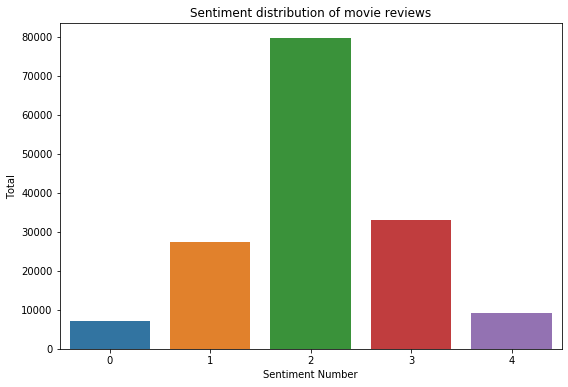

In [15]:
#lets look at the distribution of the sentiment over the train data
plt.figure(figsize = [9,6])
sns.countplot(x="Sentiment", data=train)
plt.title('Sentiment distribution of movie reviews')
plt.ylabel('Total')
plt.xlabel('Sentiment Number')
plt.show();

# Step 2: Split train/test data for hold-out test

In [16]:
# check the sklearn documentation for train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# "test_size" : float, int, None, optional
# If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
# If int, represents the absolute number of test samples. 
# If None, the value is set to the complement of the train size. 
# By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.    

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(93636,) (93636,) (62424,) (62424,)
almost in a class with that of Wilde
3
escape movie
2


# Step 2.1 Data Checking

In [18]:
# Checking whether the data set is balanced or skewed

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)))

[[    0     1     2     3     4]
 [ 4141 16449 47718 19859  5469]]


In [19]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)))

[[    0     1     2     3     4]
 [ 2931 10824 31864 13068  3737]]


# Step 3: Vectorization

In [36]:
#refernce- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#refernce- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#  unigram boolean vectorizer
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True,min_df =5, stop_words='english')

#  unigram term frequency vectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False,min_df =5, stop_words='english')

#  unigram and bigram term frequency vectorizer
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2),min_df =5,stop_words='english')

#  unigram tfidf vectorizer
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True,  min_df =5,stop_words='english')


## Step 3.1: Vectorize the training data

In [37]:
# fitting vocabulary in training documents and transforming the training documents into vectors
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

# checking the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# checking the size of the constructed vocabulary
print(len(unigram_count_vectorizer.vocabulary_))

# printing out the first 10 items in the vocabulary
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])


(93636, 11967)
[[0 0 0 ... 0 0 0]]
11967
[('class', 1858), ('wilde', 11742), ('derring', 2802), ('chilling', 1764), ('affecting', 313), ('meanspirited', 6557), ('personal', 7662), ('low', 6296), ('involved', 5602), ('worth', 11868)]


## Step 3.2: Vectorize the test data

In [38]:
X_test_vec = unigram_count_vectorizer.transform(X_test)
print(X_test_vec.shape)

(62424, 11967)


In [39]:
#refernce- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
X_train_vec = unigram_bool_vectorizer.fit_transform(X_train)
print(X_train_vec.shape)
X_test_vec = unigram_bool_vectorizer.transform(X_test)
print(X_test_vec.shape)

(93636, 11967)
(62424, 11967)


# Step 4: Train a MNB classifier

In [40]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)
print(nb_clf.classes_)
print(nb_clf.feature_log_prob_.shape)

[0 1 2 3 4]
(5, 11967)


In [41]:
# sort the conditional probability for category 0 "very negative"
# printing the words with highest conditional probs
# these can be words popular in the "very negative" category alone, 
# or words popular in all cateogires

feature_ranks = sorted(zip(nb_clf.feature_log_prob_[0], unigram_count_vectorizer.get_feature_names()))
very_negative_features = feature_ranks[-10:]
print(very_negative_features)

[(-5.946405317563997, 'time'), (-5.935710028447249, 'minutes'), (-5.925127919116712, 'characters'), (-5.925127919116712, 'story'), (-5.90429383221387, 'comedy'), (-5.6998813176057235, 'just'), (-5.195801081979265, 'like'), (-5.071833039257134, 'bad'), (-4.847793028895888, 'film'), (-4.322025825131698, 'movie')]


# Step 5: Testing the MNB classifier

In [42]:
# testing the classifier on the test data set
#printing accuracy score
nb_clf.score(X_test_vec,y_test)

0.606401384083045

In [43]:
# printing confusion matrix (row: ground truth; col: prediction)

from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(cm)

[[  733  1264   817   106    11]
 [  602  4132  5411   649    30]
 [  246  2397 25756  3226   239]
 [   19   454  5580  6248   767]
 [    1    54   725  1972   985]]


In [44]:
# printing classification report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=target_names))

[0.45783885 0.49777135 0.67267361 0.51208917 0.48474409]
[0.2500853  0.38174427 0.80831032 0.47811448 0.26358041]
              precision    recall  f1-score   support

           0       0.46      0.25      0.32      2931
           1       0.50      0.38      0.43     10824
           2       0.67      0.81      0.73     31864
           3       0.51      0.48      0.49     13068
           4       0.48      0.26      0.34      3737

    accuracy                           0.61     62424
   macro avg       0.53      0.44      0.47     62424
weighted avg       0.59      0.61      0.59     62424



# BernoulliNB

In [46]:
from sklearn.naive_bayes import BernoulliNB
X_train_vec_bool = unigram_bool_vectorizer.fit_transform(X_train)
bernoulliNB_clf = BernoulliNB(X_train_vec_bool, y_train)

In [51]:
# cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.5595474569680894


# Cross validation with differnt vectorization 

In [52]:
# run 3-fold cross validation to compare the performance of 
# (1) BernoulliNB (2) MultinomialNB with TF vectors (3) MultinomialNB with boolean vectors

##Bernoulli
bNB_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1',binary=False)),('bernNB',BernoulliNB())])
scores = cross_val_score(bNB_pipe,X,y,cv=3)
print(sum(scores)/len(scores))

##MNB TFIDF
mNB_tfidf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=True,binary=False)),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tfidf_pipe,X,y,cv=3)
print(sum(scores)/len(scores))

##MNB TF
mNB_tf_pipe = Pipeline([('nb_tf',TfidfVectorizer(encoding='latin-1',use_idf=False,binary=False)),('nb',MultinomialNB())])
scores = cross_val_score(mNB_tf_pipe,X,y,cv=3)
print(sum(scores)/len(scores))

##MNB with Bool
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=True)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.5531524365695574
0.5538446113746779
0.5523067630016177
0.5601369637205256


# Using external linguistic resources:- stemmer

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

stem_vectorizer = StemmedCountVectorizer(min_df=3, analyzer="word")
X_train_stem_vec = stem_vectorizer.fit_transform(X_train)

In [56]:
# checking the content of a document vector
print(X_train_stem_vec.shape)
print(X_train_stem_vec[0].toarray())

# checking the size of the constructed vocabulary
print(len(stem_vectorizer.vocabulary_))

# printing out the first 10 items in the vocabulary
print(list(stem_vectorizer.vocabulary_.items())[:10])

(93636, 9968)
[[0 0 0 ... 0 0 0]]
9968
[('almost', 367), ('in', 4378), ('class', 1651), ('with', 9804), ('that', 8772), ('of', 6064), ('wild', 9763), ('whose', 9749), ('der', 2331), ('do', 2541)]


# LinearSVC classifier

In [55]:
# importing the LinearSVC module
from sklearn.svm import LinearSVC

# initializing the LinearSVC model
svm_clf = LinearSVC(C=1)

# using the training data to train the model
svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
from sklearn.metrics import confusion_matrix
y_pred = svm_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4])
print(cm)

[[  913  1229   696    79    14]
 [  705  4094  5472   527    26]
 [  190  2111 27063  2324   176]
 [   33   394  6011  5568  1062]
 [    3    51   582  1775  1326]]


In [58]:
# printing classification report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=target_names))

[0.49511931 0.51960909 0.67956509 0.54200331 0.50921659]
[0.31149778 0.37823356 0.8493284  0.42607897 0.35483008]
              precision    recall  f1-score   support

           0       0.50      0.31      0.38      2931
           1       0.52      0.38      0.44     10824
           2       0.68      0.85      0.76     31864
           3       0.54      0.43      0.48     13068
           4       0.51      0.35      0.42      3737

    accuracy                           0.62     62424
   macro avg       0.55      0.46      0.49     62424
weighted avg       0.60      0.62      0.60     62424



In [59]:
## digging deeper and printing out some negative words to see what scores are assigned
## For category "0" (very negative), geting all features and their weights and sorting them in increasing order
feature_ranks = sorted(zip(svm_clf.coef_[0], unigram_count_vectorizer.get_feature_names()))

## printing features that are best indicators of very negative sentiment
very_negative_10 = feature_ranks[-10:]
print("Very negative words")
for i in range(0, len(very_negative_10)):
    print(very_negative_10[i])
print()

## printing 10 features that are least relevant to "very negative" sentiment
not_very_negative_10 = feature_ranks[:10]
print("not very negative words")
for i in range(0, len(not_very_negative_10)):
    print(not_very_negative_10[i])
print()


Very negative words
(1.6275629476015396, 'cesspool')
(1.6637718518540685, 'pompous')
(1.6918278618171216, 'stinks')
(1.6987737759479684, 'distasteful')
(1.712167609810901, 'unwatchable')
(1.7288295066294603, 'disappointment')
(1.759290357596579, 'unbearable')
(1.8085408043365854, 'stinker')
(1.8268012356632481, 'worthless')
(1.8341330416307624, 'disgusting')

not very negative words
(-1.8437632060702926, 'hawke')
(-1.6993728108553068, 'collar')
(-1.6976858613154775, 'giddy')
(-1.5910864212565061, 'swimfan')
(-1.5714608003054282, 'blue')
(-1.4870190325221853, 'dogtown')
(-1.4322894732858364, 'victim')
(-1.41585093536706, 'joan')
(-1.4137338227176226, 'won')
(-1.4045009839086844, 'innocence')



In [78]:
test


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [88]:
#saving the output file of the best performing model
y_pred=svm_clf.predict(X_test_vec)
output = open('C:\\Users\\Divya\\Desktop\\Syracuse University\\summer Sem\\NLP Project\\FinalProjectData\\FinalProjectData\\kagglemoviereviews\\linearSVC_prediction_output.csv', 'w')
for x, value in enumerate(y_pred):
    output.write(str(value) + '\n')
output.close()

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [93]:
output = open('C:\\Users\\Divya\\Desktop\\Syracuse University\\summer Sem\\NLP Project\\FinalProjectData\\FinalProjectData\\kagglemoviereviews\\linearSVC_prediction_output2.csv', 'w')
for x, value in enumerate(test['PhraseId']):
    output.write(str(test['PhraseId']) + '\n')
output.close()

In [97]:
output = open('C:\\Users\\Divya\\Desktop\\Syracuse University\\summer Sem\\NLP Project\\FinalProjectData\\FinalProjectData\\kagglemoviereviews\\linearSVC_prediction_output3.csv', 'w')
#for id in test['PhraseId']:
 #   x = str(test['PhraseId'])
  #  output.write(x)
#output.close  ##
for x, value in enumerate(test['PhraseId']):
    output.write(str(value) + '\n')
output.close()

In [81]:
svm_clf.score(X_test_vec,y_test)

0.6241830065359477

## Random forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

C:\Users\Divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
# cross validation
clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('rf', RandomForestClassifier())])
scores = cross_val_score(clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

C:\Users\Divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5365306212276564


In [66]:
#Conclusion is given in detail in the report

# End